<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Why Python for Finance?

分析速度
决策往往必须在几毫秒甚至更短的时间内做出，有必要构建独自的分析能力工具，并实时分析大量数据。

实时经济
过去，决策者只能依赖结构化的定期计划、决策和风险管理过程，而今天决策者面对的是实时完成这些任务的需求。过去在后台通过隔夜批量运行可以完成的任务，现在已经转向前台实时执行。

## Zen of Python

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## The Python Ecosystem

In [2]:
100 * 2.5 + 50

300.0

In [3]:
# causes intentional error
# log(1)  

In [4]:
import math  

In [5]:
math.log(1)  

0.0

## Finance and Python Syntax

通过蒙特卡洛模拟方法估计欧式看涨期权的价值来说明这一现象。我们将考虑Black-Scholes-Merton（BSM）模型，在这种模型中期权的潜在风险遵循几何布朗运动。

In [6]:
import math
import numpy as np  

In [7]:
# 初始股票指数水平S0=100；欧式看涨期权的行权价格K=105；到期时间T=1年；固定无风险短期利率r=5%；固定波动率σ=20%。

S0 = 100.  
K = 105.  # <2
T = 1.0  
r = 0.05  
sigma = 0.2  

In [8]:
I = 100000  

In [9]:
np.random.seed(1000)  

In [10]:
z = np.random.standard_normal(I)  

In [11]:
ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * z)  

In [12]:
hT = np.maximum(ST - K, 0)  

In [13]:
C0 = math.exp(-r * T) * np.mean(hT)  

In [14]:
print('Value of the European call option: {:5.3f}.'.format(C0))  

Value of the European call option: 8.019.


In [15]:
%run bsm_mcs_euro.py

Value of the European call option 7.989.


In [18]:
%%timeit
from bsm_msc_euro import bsm_mcs_euro_demo
print('Value of the European call option: {:5.3f}.'.format(bsm_mcs_euro_demo.valuation(s0 = 100, k = 110, t = 2.0, r = 0.08, sigma = 0.1, times = 1000000)))

Value of the European call option: 9.143.
Value of the European call option: 9.146.
Value of the European call option: 9.156.
Value of the European call option: 9.168.
Value of the European call option: 9.149.
Value of the European call option: 9.155.
Value of the European call option: 9.157.
Value of the European call option: 9.172.
Value of the European call option: 9.166.
Value of the European call option: 9.158.
Value of the European call option: 9.156.
Value of the European call option: 9.158.
Value of the European call option: 9.150.
Value of the European call option: 9.145.
Value of the European call option: 9.149.
Value of the European call option: 9.162.
Value of the European call option: 9.162.
Value of the European call option: 9.158.
Value of the European call option: 9.136.
Value of the European call option: 9.158.
Value of the European call option: 9.153.
Value of the European call option: 9.161.
Value of the European call option: 9.146.
Value of the European call option:

## Time-to-Results

In [19]:
import numpy as np  
import pandas as pd  
from pylab import plt, mpl  

In [20]:
plt.style.use('seaborn')  
mpl.rcParams['font.family'] = 'serif'  
%matplotlib inline

In [21]:
data = pd.read_csv('../../source/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)  
data = pd.DataFrame(data['.SPX']) 
data.dropna(inplace=True)  
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


In [22]:
data['rets'] = np.log(data / data.shift(1))  
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)  

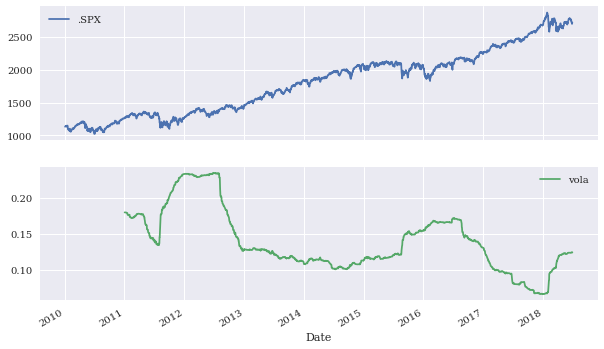

In [23]:
data[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6));  
# plt.savefig('../../images/ch01/spx_volatility.png')

## Idioms & Paradigms

In [24]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

1.46 s ± 33.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
# 使用NumPy可以完成相同的任务，它提供了优化（也就是预先编译）的函数来处理这种基于数组的运算
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

79.3 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
# \有一个库是专门用于此类任务的，这个库叫作numexpr，得名于“数值表达式”（Numerical Expressions）。它可以编译表达式来改善NumPy通用功能的性能。例如，在执行期间避免ndarray对象在内存中复制
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

37.6 ms ± 2.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
# numexpr还内建并行执行单独运算的功能。这使我们能够使用一个CPU的多个线程
ne.set_num_threads(8)
%timeit r = ne.evaluate(f)

10.8 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


从执行速度的角度看，交互式分析的效率和性能当然是Python值得考虑的两个好处。在金融学中使用Python的另一个好处初看似乎比较不起眼，但是细看之下就会发现它本身是一个重要的战略因素。这就是***以端到端（从原型化到生产）的方式使用Python的可能性***。

当今全球金融机构的金融开发过程往往是一个分离的两步式过程。一方面，量化分析师（quant，也称宽客）负责模型开发和技术原型化。他们喜欢使用MatLab和R等工具和环境实现快速、交互式的应用程序开发。在开发的这一阶段，性能、稳定性、异常管理、数据访问分离和分析等问题都不重要。人们的主要目标是概念或者原型的验证，原型用于展现某种算法或者整个应用程序必需的主要功能。



一旦原型完成，IT部门中的开发人员接管工作，他们负责将现有原型代码翻译为可靠、易于维护和高性能的生产代码。这一阶段中，通常在用于满足生产性能的C++或者Java语言中有一个范型转换的过程。而且，正规的开发过程还要用到专业工具、版本控制等技术。这种两步式方法会产生一些意外的结果。效率低下原型代码不能重用；算法必须实现两次；多余的工作消耗时间和资源；转译时产生的风险。多种技能集不同部门展现不同的技能集合，使用不同的语言实现“相同的工作”。遗留代码代码必须以不同的语言存在和维护，并使用不同的实现风格（例如，从架构的观点上看）。


另一方面，使用Python可以实现合理化的端到端过程——从最初的交互式原型化步骤到高可靠性、易于维护的生产代码。不同部门之间的沟通变得更加简单，工作人员的培训也更为合理，只有一种主要语言覆盖金融应用构建的所有领域，还避免了在开发过程不同步骤中使用不同技术造成的低效和冗余性。总而言之，Python可以为金融应用开发和算法实现提供一致性的技术框架。

## Data-Driven & AI-First Finance

### Data-Driven Finance 

**This sub-section requires a Eikon license. Therefore no code is provided.**

### AI-First Finance 

In [40]:
import numpy as np
import pandas as pd

In [45]:
data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)
data = pd.DataFrame(data['AAPL.O'])  
data['Returns'] = np.log(data / data.shift())  
data.dropna(inplace=True)
print(data)

AAPL.O   Returns
Date                            
2010-01-05   30.625684  0.001727
2010-01-06   30.138541 -0.016034
2010-01-07   30.082827 -0.001850
2010-01-08   30.282827  0.006626
2010-01-11   30.015684 -0.008861
...                ...       ...
2018-06-25  182.170000 -0.014983
2018-06-26  184.430000  0.012330
2018-06-27  184.160000 -0.001465
2018-06-28  185.500000  0.007250
2018-06-29  185.110000 -0.002105

[2061 rows x 2 columns]


In [46]:
lags = 6

In [48]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))  
    cols.append(col)
data.dropna(inplace=True)
print(cols)
print(data)

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']
                AAPL.O   Returns  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6
Date                                                                      
2010-01-25   29.010685  0.026572   -1.0   -1.0   -1.0   -1.0   -1.0    1.0
2010-01-26   29.419971  0.014009    1.0   -1.0   -1.0   -1.0   -1.0   -1.0
2010-01-27   29.697685  0.009395    1.0    1.0   -1.0   -1.0   -1.0   -1.0
2010-01-28   28.469972 -0.042219    1.0    1.0    1.0   -1.0   -1.0   -1.0
2010-01-29   27.437544 -0.036938   -1.0    1.0    1.0    1.0   -1.0   -1.0
...                ...       ...    ...    ...    ...    ...    ...    ...
2018-06-25  182.170000 -0.014983   -1.0   -1.0    1.0   -1.0   -1.0   -1.0
2018-06-26  184.430000  0.012330   -1.0   -1.0   -1.0    1.0   -1.0   -1.0
2018-06-27  184.160000 -0.001465    1.0   -1.0   -1.0   -1.0    1.0   -1.0
2018-06-28  185.500000  0.007250   -1.0    1.0   -1.0   -1.0   -1.0    1.0
2018-06-29  185.110000 -0.002105    1.0   -1.

In [49]:
from sklearn.svm import SVC

In [51]:
model = SVC(gamma='scale')  

In [52]:
model.fit(data[cols], np.sign(data['Returns']))  

SVC()

In [53]:
data['Prediction'] = model.predict(data[cols])  

In [54]:
data['Strategy'] = data['Prediction'] * data['Returns']  

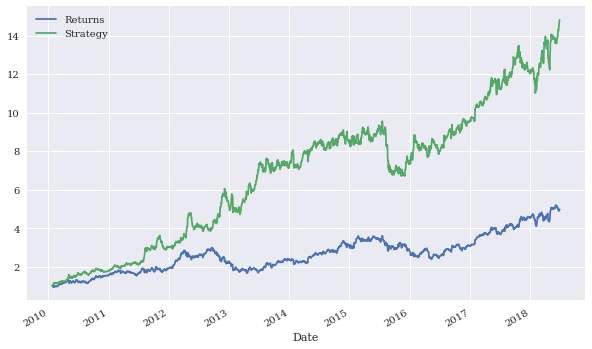

In [55]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));  
# plt.savefig('../../images/ch01/AAPL_trading_strategy.png');